# Deep Learning - MVA : TP1

<ul>
    <li><b>Student :</b> Matthieu TOULEMONT</li>
    <li><b>Email : </b> matthieu.toulemont@eleves.enpc.fr</li>
</ul>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from mp1 import*
from utils import *
from classification import *
from regression import *
from hourglass import *

/home/matthieu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Question 1 : Simple Classification

In [2]:
[X_train, Y_train] = generate_dataset_classification(300,20)
[X_test, Y_test] = generate_dataset_classification(100,20)
Xr_train = X_train.reshape(300,72,72,1)
Yh_train = oneHot(Y_train)

Xr_test = X_test.reshape(100,72,72,1)
Yh_test = oneHot(Y_test)

Creating data:
0
Creating data:
0


In [3]:
mcp_base_model = makeMCP("base_model_classif")
model = base_model()
history = model.fit(X_train, Yh_train, epochs=30, batch_size=10, verbose=0, validation_split=0.1, callbacks = [mcp_base_model])

best_base_model = loadModel("base_model_classif")
eval_model(best_base_model, [X_train, Yh_train], [X_test, Yh_test])

300/300 [==============================] - 0s 156us/step
Training set : [0.014447327312082052, 1.0]
100/100 [==============================] - 0s 53us/step
Testing set : [0.01872018225491047, 1.0]


In [5]:
mcp_cnn_model = makeMCP("cnn_model_classif")
cnn_model = cnn_model_Q1()
history = cnn_model.fit(Xr_train, Yh_train, epochs=10, batch_size=50, verbose=0, validation_split=0.1, callbacks = [mcp_cnn_model])

best_cnn_model = loadModel("cnn_model_classif")
eval_model(best_cnn_model, [Xr_train, Yh_train], [Xr_test, Yh_test])

300/300 [==============================] - 0s 1ms/step
Training set : [0.015460374976197878, 1.0]
100/100 [==============================] - 0s 769us/step
Testing set : [0.008501919880509377, 1.0]


##### Conclusion

Both the linear model and the CNN gives similar performance accuracy-wise.

### Visualization of the Solution

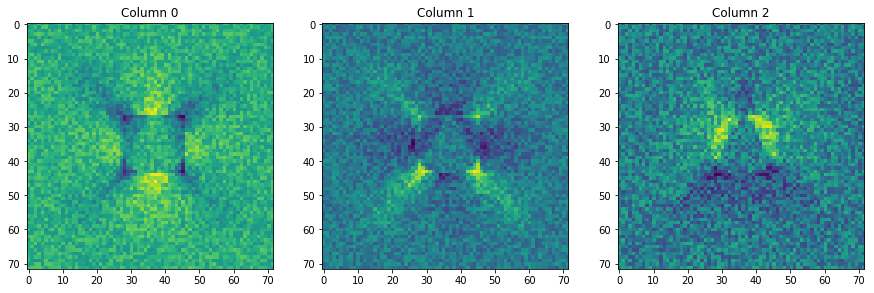

In [6]:
w0,w1 = model.get_weights()
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15))
for i in range(3):
    axs[i].imshow(w0[:,i].reshape(72,72))
    axs[i].set_title("Column "+str(i))
plt.show()

# A more difficult Classification Problem 

#### Linear Classifier

In [7]:
[X_train, Y_train] = generate_dataset_classification(1000,20, True)
Xr_train, Yh_train = X_train.reshape(1000,72,72,1), oneHot(Y_train)

[X_test, Y_test] = generate_test_set_classification()
Xr_test, Yh_test = X_test.reshape(-1,72,72,1), Y_test

Creating data:
0
Creating data:
0


1000/1000 [==============================] - 0s 49us/step
Training set : [1.1144404277801514, 0.643]
300/300 [==============================] - 0s 50us/step
Testing set : [1.3840773208936055, 0.6233333325386048]


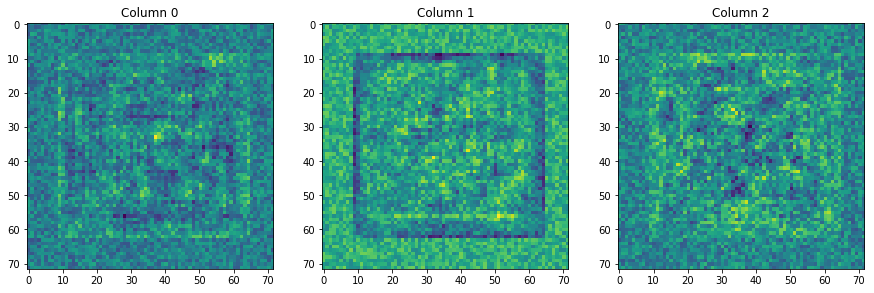

In [8]:
model = base_model()
history = model.fit(X_train, Yh_train, epochs=30, batch_size=10, verbose=0, validation_split=0.1)
eval_model(model, [X_train, Yh_train], [X_test, Yh_test])

w0,w1 = model.get_weights()
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15))
for i in range(3):
    axs[i].imshow(w0[:,i].reshape(72,72))
    axs[i].set_title("Column "+str(i))
plt.show()

#### CNN 

In [28]:
mcp_cnn_model = makeMCP("cnn_model_bn_classif")
cnn_model_bn = cnn_model_bn_Q1()
history = cnn_model_bn.fit(Xr_train, Yh_train, epochs=10, batch_size=100, verbose=0, validation_split=0.1, callbacks = [mcp_cnn_model])

best_cnn_model_bn = loadModel("cnn_model_bn_classif")
eval_model(best_cnn_model_bn, [Xr_train, Yh_train], [Xr_test, Yh_test])

1000/1000 [==============================] - 4s 4ms/step
Training set : [0.07989962089061738, 0.99]
300/300 [==============================] - 0s 957us/step
Testing set : [0.2122262688477834, 0.9366666674613953]


#### Conclusion
Using a CNN gives better performance than a linear model for both the loss function and the accuracy measure. The convolutions enables the network to identify the objects regardless of their location in the image. 

However, it seems that depending on the initialization of this CNN the performance varies a lot. 

For instance the weights from "cnn_model_bn_classif88.hdf5" give a 88.6% accuracy on the testing set.

Whereas the weights from "cnn_model_bn_classif88.hdf5" give a 91.3% accuracy on the testing set.

And finally those from "cnn_model_bn_classif63.hdf5" give a 63% accuracy on the testing set. 

In [23]:
cnn_model_bn_91 = loadModel("cnn_model_bn_classif91")
eval_model(cnn_model_bn_91, [Xr_train, Yh_train], [Xr_test, Yh_test])

1000/1000 [==============================] - 3s 3ms/step
Training set : [0.12086308765411377, 0.963]
300/300 [==============================] - 0s 967us/step
Testing set : [0.22272093137105306, 0.913333334128062]


In [24]:
cnn_model_bn_88 = loadModel("cnn_model_bn_classif88")
eval_model(cnn_model_bn_88, [Xr_train, Yh_train], [Xr_test, Yh_test])

1000/1000 [==============================] - 3s 3ms/step
Training set : [0.19642110180854797, 0.939]
300/300 [==============================] - 0s 961us/step
Testing set : [0.33477357467015584, 0.8866666666666667]


In [27]:
cnn_model_bn_63 = loadModel("cnn_model_bn_classif63")
eval_model(cnn_model_bn_63, [Xr_train, Yh_train], [Xr_test, Yh_test])

1000/1000 [==============================] - 3s 3ms/step
Training set : [0.605584490776062, 0.696]
300/300 [==============================] - 0s 979us/step
Testing set : [0.70122918009758, 0.63]


Fortunately It seems that most of the time the performance is above 85% accuracy on the test set. 

# A regression problem 

In [29]:
save_to = "cnn_reg"
mcp_reg = makeMCP(save_to)

In [30]:
[X_train, Y_train_reg] = generate_dataset_regression(5000,20)
[X_test, Y_test_reg] = generate_test_set_regression()

Y_train_sx = sort_by_x(Y_train_reg)
Y_test_sx = sort_by_x(Y_test_reg)

Creating data:
0
1000
2000
3000
4000
Creating data:
0


In [31]:
normalizer = StandardScaler()
std = False
if std:
    y_train_normalize = normalizer.fit_transform(Y_train_reg)
    y_test_normalize = normalizer.transform(Y_test_reg)
else:
    y_train_normalize = 2*(Y_train_sx-0.5)
    y_test_normalize = 2*(Y_test_sx-0.5)

Xr_train = X_train.reshape(5000,72,72,1)
Xr_test = X_test.reshape(-1,72,72,1)

In [32]:
model = cnn_reg_dp()

history = model.fit(Xr_train, y_train_normalize,validation_split=0.1, epochs=10, batch_size=16, verbose = 1, callbacks = [mcp_reg])
eval_model(model, [Xr_train, y_train_normalize], [Xr_test, y_test_normalize])

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 19s 4ms/step - loss: 0.1335 - val_loss: 0.0790
Epoch 2/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0542 - val_loss: 0.0417
Epoch 3/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0349 - val_loss: 0.0354
Epoch 4/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0263 - val_loss: 0.0258
Epoch 5/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0223 - val_loss: 0.0238
Epoch 6/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0195 - val_loss: 0.0220
Epoch 7/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0173 - val_loss: 0.0172
Epoch 8/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0156 - val_loss: 0.0182
Epoch 9/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0146 - val_loss: 0.0195
Epoch 10/10
5000/5000 [===

Training set


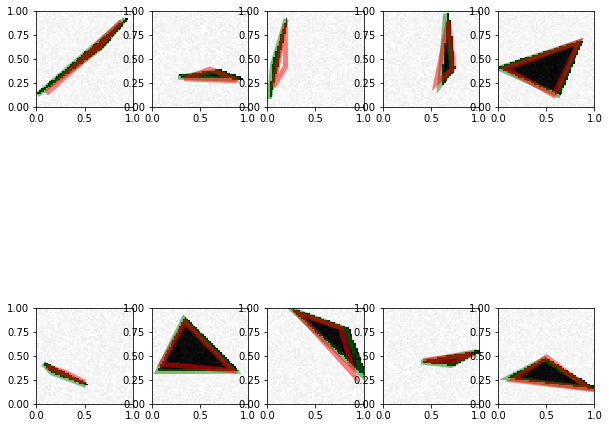

In [33]:
I = np.random.randint(0,X_train.shape[0],  10)
print("Training set")
plotRes(model, I, Xr_train, y_train_normalize)

Testing Set


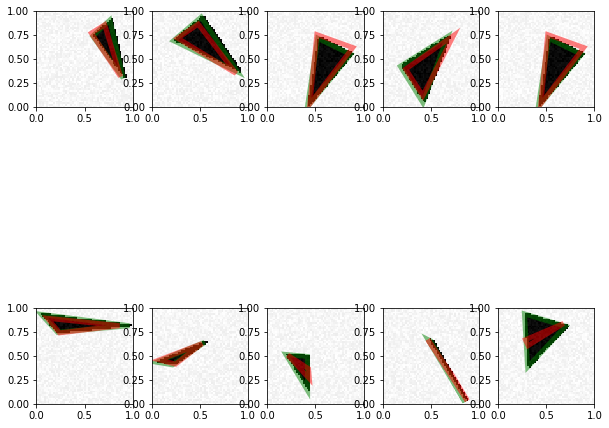

In [34]:
I = np.random.randint(0,X_test.shape[0],  10)
print("Testing Set")
plotRes(model, I, Xr_test, y_test_normalize)

#### First layer kernels 

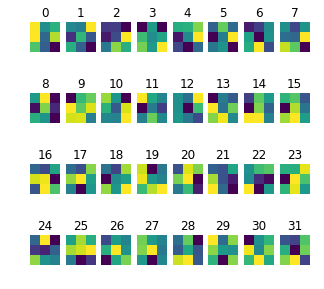

In [35]:
layer = 0
channels = {0:32}
fig , axs = plt.subplots(nrows = channels[layer]//8, ncols = 8, figsize = (5,5))
for i in range(channels[layer]):
    ki = i//8
    kj = i - ki*8
    axs[ki,kj].imshow(model.get_weights()[layer][:,:,0,i])
    axs[ki,kj].set_title(str(i))
    axs[ki,kj].axis('off')
plt.show()


## Hourglass network for denoising 

In [37]:
N = 500
X_train,_ = generate_dataset_classification(N,free_location=False)
X_train = X_train.reshape(N, 72,72,1)
X_noise_train = np.clip(X_train + np.random.normal(loc = 0, scale = 0.4, size = X_train.shape),0,1)


X_test,_ = generate_dataset_classification(100,free_location=False)
X_test = X_test.reshape(100, 72,72,1)
X_noise_test = np.clip(X_test + np.random.normal(loc = 0, scale = 0.4, size = X_test.shape),0,1)

Creating data:
0
Creating data:
0


In [39]:
hourglass = hourglass_model()
hourglass.fit(X_noise_train,X_train, epochs=10, batch_size=4, validation_split=0.1)

Train on 450 samples, validate on 50 samples
Epoch 1/10
450/450 [==============================] - 15s 34ms/step - loss: 0.1186 - val_loss: 0.0443
Epoch 2/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0298 - val_loss: 0.0390
Epoch 3/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0221 - val_loss: 0.0146
Epoch 4/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0186 - val_loss: 0.0213
Epoch 5/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0159 - val_loss: 0.0129
Epoch 6/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0145 - val_loss: 0.0312
Epoch 7/10
450/450 [==============================] - 7s 15ms/step - loss: 0.0124 - val_loss: 0.0095
Epoch 8/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0130 - val_loss: 0.0097
Epoch 9/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 10/10
450/450 [========================

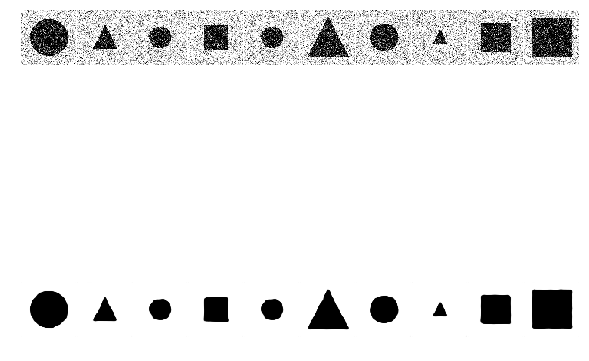

In [40]:
I = np.random.randint(0, X_test.shape[0], 10)
plot_denoising_res(hourglass, I, X_noise_test)